## 2. Visualization 
* This file deals with some exploratory data analysis and visualization of trends, correlations, etc. 
### 2.1 Importing libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### 2.2 Importing Data
* The cleaned and pruned dataset is imported. 

In [2]:
data=pd.read_csv('cleaned_ranks.csv')
data.head(5)

,Position,Track_Name,Artist,Region,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,Date
0,1,Starboy,The Weeknd,ee,0.681,0.594,7,-7.028,1,0.2820,0.1650,0.000003,0.1340,0.535,186.054,230453,4,2017-01-01
1,2,Tuesday,Burak Yeter,ee,0.839,0.645,9,-6.084,0,0.0810,0.0159,0.022800,0.0569,0.640,98.972,241875,4,2017-01-01
2,3,Closer,The Chainsmokers,ee,0.748,0.524,8,-5.599,1,0.0338,0.4140,0.000000,0.1110,0.661,95.010,244960,4,2017-01-01
3,4,Alone,Alan Walker,ee,0.676,0.929,10,-3.194,1,0.0458,0.1860,0.000405,0.1210,0.157,97.019,161200,4,2017-01-01
4,5,Rockabye (feat. Sean Paul & Anne-Marie),Clean Bandit,ee,0.720,0.763,9,-4.068,0,0.0523,0.4060,0.000000,0.1800,0.742,101.965,251088,4,2017-01-01


### 2.3 Regional distribution
*  Find number of unique songs per region.
* On an average  most regions seem to have atleast 500 different songs in their rankings, with very few crossing the 1000 mark.

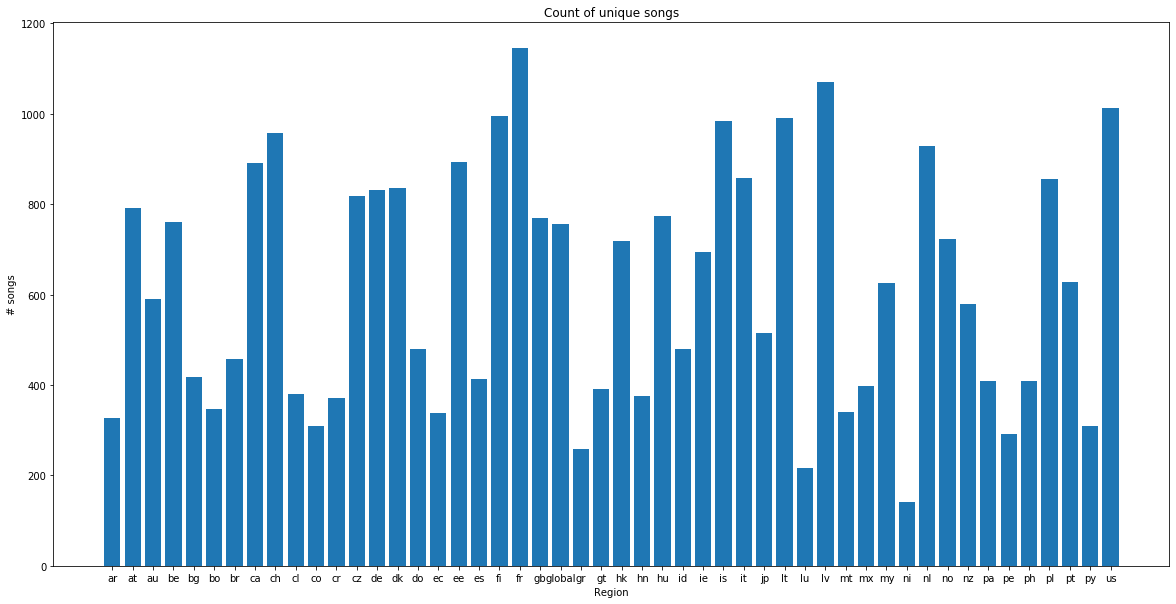

In [3]:
region_songs=(data.groupby(['Region'])['Track_Name'].unique())
count=[]
for region in region_songs:
    count.append(len(region))
fig, ax = plt.subplots(figsize=(20, 10))
points = region_songs.index 
ax.bar(points, count) 
ax.set_title('Count of unique songs') 
ax.set_xlabel('Region') 
ax.set_ylabel('# songs')
plt.show()

### 2.4 Song Features
* The file 'song_features.csv' contains a list of all the unique songs which appeared in the global rankings along with the features of each song. 
* Analyze the relationship between different features of each songs.
* A heat map, and pairplots are plotted depicting the correlation between the features. 

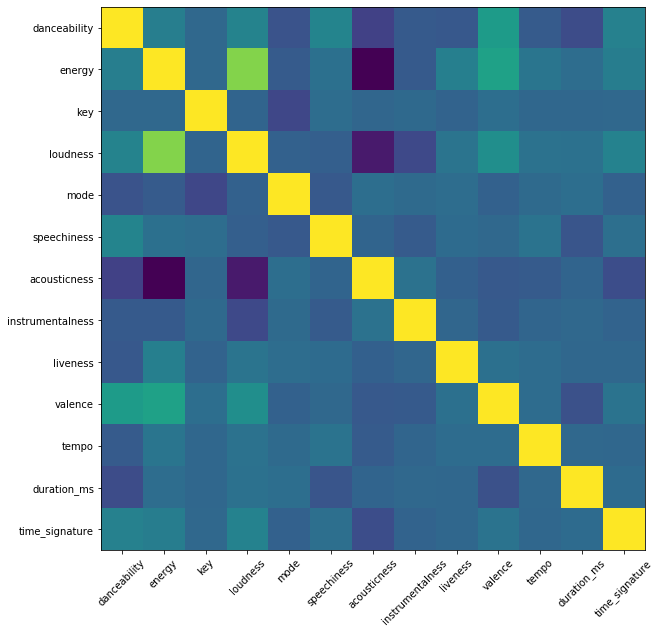

In [4]:
song_data=pd.read_csv('song_features.csv')
# print(song_data.columns)
song_data.set_index('Track_Name',inplace=True)

# get correlation matrix
corr = song_data.corr()

fig, ax = plt.subplots(figsize=(20, 10))
# create heatmap
im = ax.imshow(corr.values)

# set labels
ax.set_xticks(np.arange(len(corr.columns)))
ax.set_yticks(np.arange(len(corr.columns)))
ax.set_xticklabels(corr.columns)
ax.set_yticklabels(corr.columns)
plt.xticks(rotation=45)
plt.show()

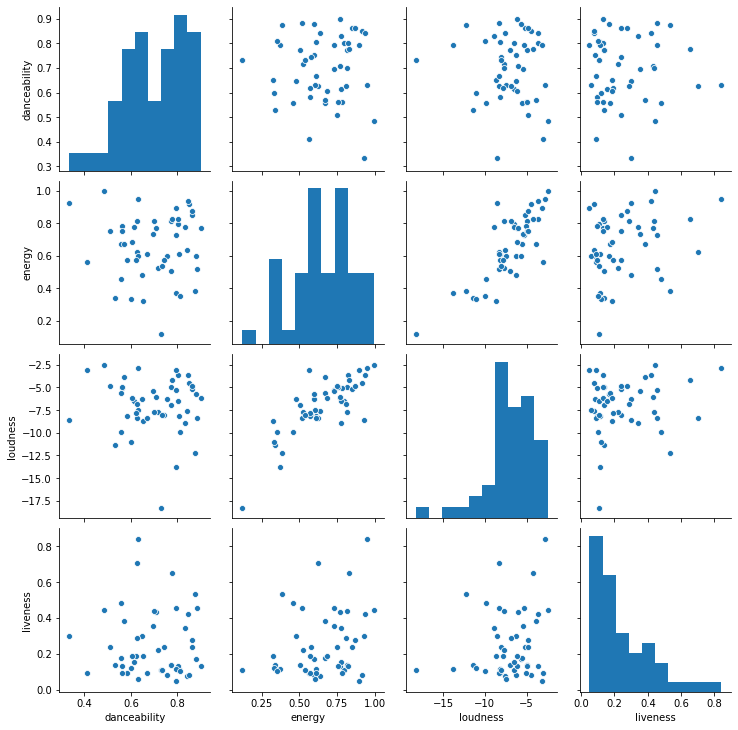

In [5]:
plot_data=song_data[['danceability','energy','loudness','liveness']].head(50)
# plot_data.head(10)
sns.pairplot(plot_data)
# print(song_data.columns)

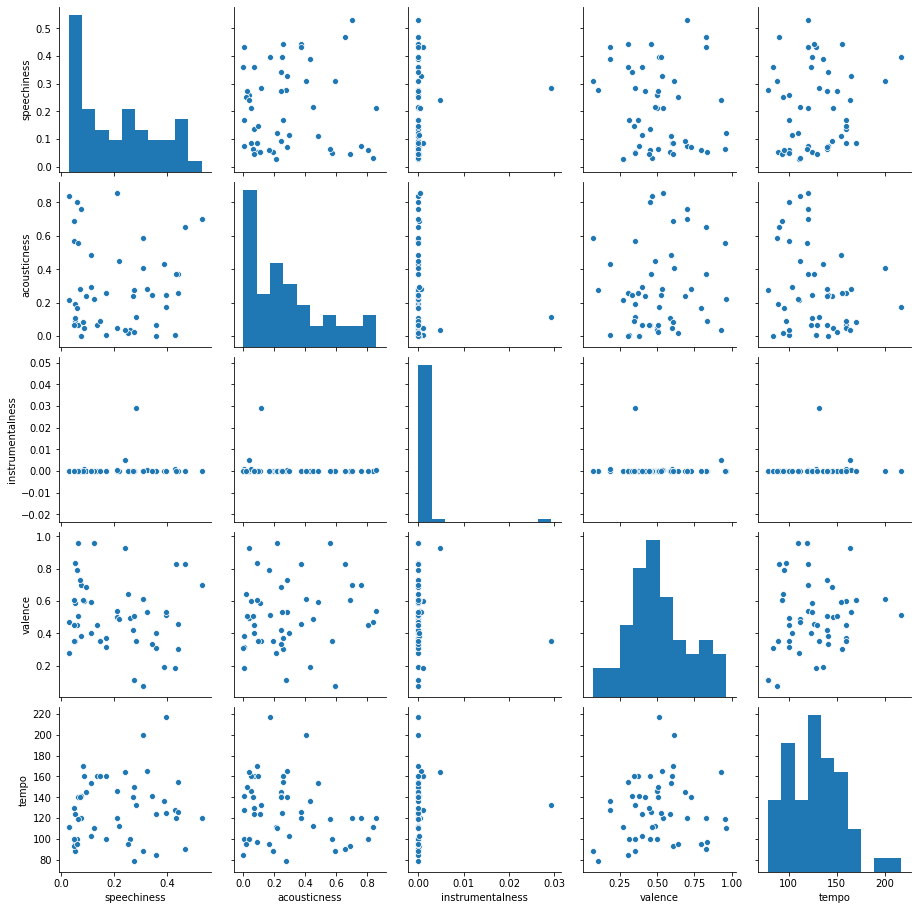

In [6]:
plot_data=song_data[['speechiness',	'acousticness',	'instrumentalness', 'valence', 'tempo']].head(50)
# plot_data.head(10)
sns.pairplot(plot_data)
# print(song_data.columns)

### 2.5 Box Plots
* Box plots are plotted for the features of each song to understand their distributions.

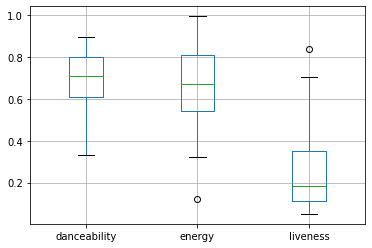

In [7]:
plot_data=song_data[['danceability','energy','loudness','liveness','tempo','speechiness','acousticness','instrumentalness', 'valence']].head(50)
boxplot = plot_data.boxplot(column=['danceability','energy','liveness'])

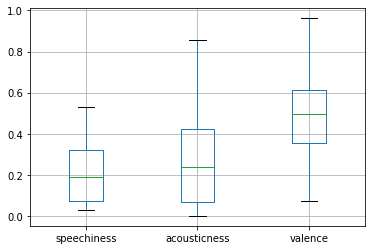

In [8]:
# plot_data=song_data[['speechiness',	'acousticness',	'instrumentalness', 'valence']].head(50)
boxplot = plot_data.boxplot(column=['speechiness',	'acousticness', 'valence'])

### 2.6 Globally popular
* The 'borda_counts.csv' file contains data about the borda_counts (popularity score) of each song for each day in each region. 
* From this information about the 'global' rankings is obtained, and plotted to find the most popular songs from 2017-2018 globally. 

In [9]:
borda_data=pd.read_csv('borda_counts.csv')
global_data=pd.DataFrame(borda_data.loc[borda_data['Region']=='global'])

global_data.head(10)

global_data_sum=pd.DataFrame(global_data.groupby(['Track_Name'])['borda_count'].sum())
global_data_sum.sort_values(by=['borda_count'],ascending=False,inplace=True)

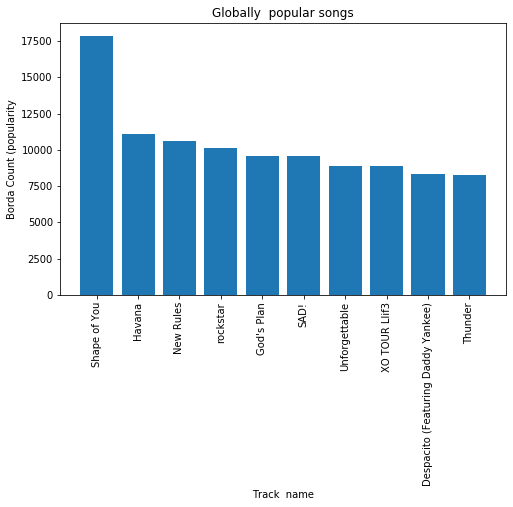

In [10]:
temp=global_data_sum.head(10)

global_popular=pd.DataFrame(columns=['Track_Name','Borda_Count'])
global_popular['Track_Name']=temp.index
global_popular['Borda_Count']=temp.values


fig, ax = plt.subplots(figsize=(8, 5))
points = global_popular['Track_Name']
count = global_popular['Borda_Count']
ax.bar(points, count) 
ax.set_title('Globally  popular songs') 
ax.set_xlabel('Track  name') 
ax.set_ylabel('Borda Count (popularity')
plt.xticks(rotation=90)
plt.show()

### 2.7 Song Data - Average number of songs ranked
* The total number of unique songs that find a place in the rankings globally is obtained.
* This is plotted to find the trend in average number of songs that get ranked every month.

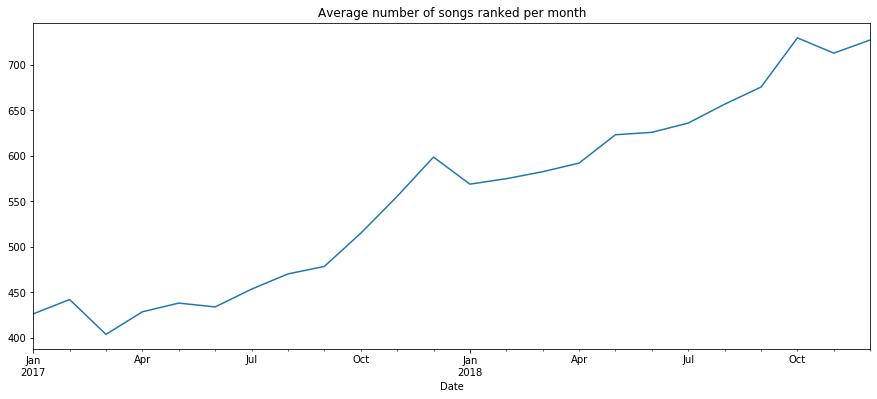

In [11]:
datewise_data=(data.groupby(['Date'])['Track_Name'].unique())
count=[]
for date in datewise_data:
    count.append(len(date))

songs_per_day=pd.DataFrame(columns=['Date','No_of_songs'])
songs_per_day['Date']=datewise_data.index
songs_per_day['No_of_songs']=count

songs_per_day['Date'] = pd.to_datetime(songs_per_day['Date'])
songs_per_day=songs_per_day.set_index('Date')
# songs_per_day
songs_per_day = songs_per_day['No_of_songs'].resample('MS').mean().fillna(0)
songs_per_day.plot(figsize=(15, 6))

plt.title('Average number of songs ranked per month') 
plt.show()

# print(len(region_songs[1]))